# Pre-processing and Training Data Development: 

## Predicting House Prices in North California

![_pre_proc](https://user-images.githubusercontent.com/67468718/111041698-64b57200-83ee-11eb-96ff-b64c11a36c04.JPG)



## Contents<a id='Contents'></a>
 * [1. Introduction](#1_Introduction)
 * [2. Sourcing and Loading](#2_Sourcing_and_Loading)
    * [2.1 Import relevant libraries](#2.1_Import_relevant_libraries)
    * [2.2 Load the data](#2.2_Load_the_data)
 * [3. Removing Outliers](#3_Removing_Outliers)
    * [3.1 Target Variable "price" Visualization](#3.1_Target_Variable_"price"_Visualization)
    * [3.2 Outliers: Standard deviation based detection](#3.2_Outliers:_Standard_deviation_based_detection)
    * [3.3 Outliers: Quantile based detection](#3.3_Outliers:_Quantile_based_detection)
    * [3.4 Visualization all difference datasets](#3.4_Visualization_all_difference_datasets)
    * [3.5 Datasets comparison using statistics summary](#3.5_Datasets_comparison_using_statistics_summary)
    * [3.6 Datasets comparision using Correlation and Applying conditional formatting](#3.6_Datasets_comparision_using_Correlation_and_Applying_conditional_formatting)
 * [4. Features Engineering](#4_Features_Engineering)
    * [4.1 Introducing New Features](#4.1_Introducing_New_Features)
    * [4.2 Dropping and encoding Features](#4.2_Dropping_and_encoding_Features)
    * [4.3 Final DataFrame Summary](#4.3_Final_DataFrame_Summary)
    * [4.4 Final Visualization of our Target Variable 'price'](#4.4_Final_Visualization_of_our_Target_Variable_'price')
 * [5. Features Selection: Define/Select Features](#5_Features_Selection:_Define/Select_Features)
 * [6. Train/Test Split](#6_Train/Test_Split)
 * [7. Scaling and Transformation: Standardization](#7_Scaling_and_Transformation:_Standardization)
 * [8. Modeling](#8_Modeling)
    * [8.1 Linear Regression](#8.1_Linear_Regression)
      * [8.1.1 Fitting Linear Regression](#8.1.1_Fitting_Linear_Regression)
      * [8.1.2 Linear Regression: intercept & Coefficients](#8.1.2_Linear_Regression:_intercept_&_Coefficients)
      * [8.1.3 Linear Regression: Residuals Visualization](#8.1.3_Linear_Regression:_Residuals_Visualization)
      * [8.1.4 Linear Regression Model Evaluation](#8.1.4_Linear_Regression_Model_Evaluation)
      * [8.1.5 5-fold cross-validation](#8.1.5_5-fold_cross-validation)
    * [8.2 Models next step](#8.2_Models_next_step)
 * [9. Saving our data](#9_Saving_our_data)

## 1. Introduction<a id='1_Introduction'></a>

The pre-processing and Training data is considered as the final step for data manipulation, where we can make sure that: 

 * No Outliers
 * No missing data
 * Features Engineering: 
   * Engineer New Features
   * Drop Features
   * Change features structure
   * Encode Features
   * Train and test split the data set



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [ ]:
# Check Current Directory:
os.getcwd()

In [9]:
# Changing the directory:
os.chdir(r"path/EDA/Datasets")

In [ ]:
#Confirm the directory:
os.getcwd()

In [11]:
# List files/folders in the cd:
os.listdir()

['df.csv', 'price_1.csv', 'price_2.csv', 'price_3.csv']

In [12]:
filenames = ['df.csv', 'price_1.csv', 'price_2.csv', 'price_3.csv']

dataframes =[]

for f in filenames:
    dataframes.append(pd.read_csv(f, encoding='ISO-8859-1'))

In [13]:
#let's rename the dataframes according to the above filenames list:
df = dataframes[0]
price_1 = dataframes[1]
price_2 = dataframes[2]
price_3 = dataframes[3]


## 3. Removing Outliers<a id='3_Removing_Outliers'></a>

Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the lower bound.


### 3.1 Target Variable "price" Visualization with Outliers boundaries using Quantile and Standrad Deviation<a id='3.1_Target_Variable_"price"_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


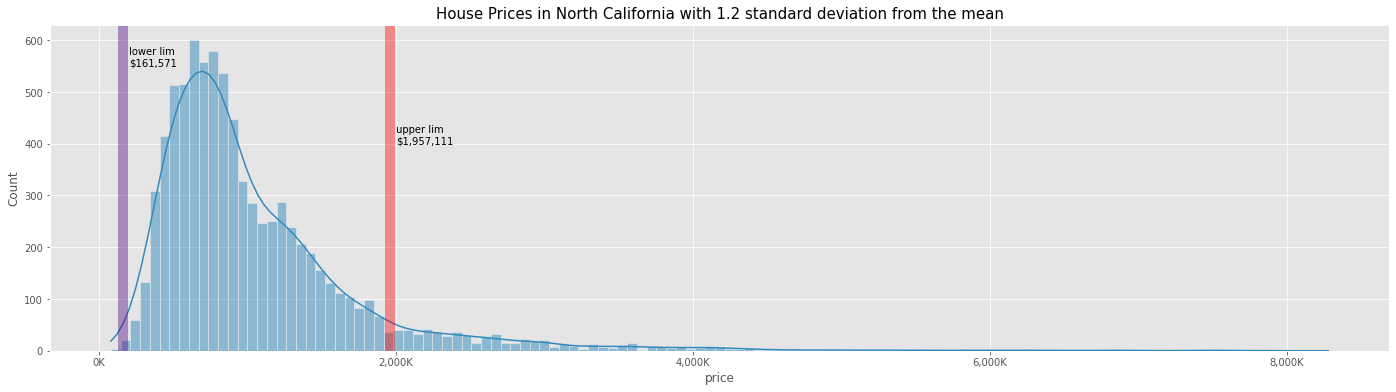

In [14]:
# Making a histogram of the price variable and adding Standard deviation based detection"
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)

# let's choose 1.2 standard deviation from the mean:
factor = 1.2

# let's define upper:
upper_lim = df['price'].mean () + df['price'].std () * factor

# let's define lower:
lower_lim = df['price'].mean () - df['price'].std () * factor

#Plot upper and lower based on 1.2 standard deviation from the mean:
ax.axvline(upper_lim, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_lim, color='indigo', ls='-', alpha=0.4, lw=10)
ax.set_title('House Prices in North California with 1.2 standard deviation from the mean', fontsize=15)
plt.annotate('upper lim \n$1,957,111', xy=(1957111, 400), xytext=(2000000, 400), fontsize=10)
plt.annotate('lower lim \n$161,571', xy=(161571, 550), xytext=(200000, 550), fontsize=10)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


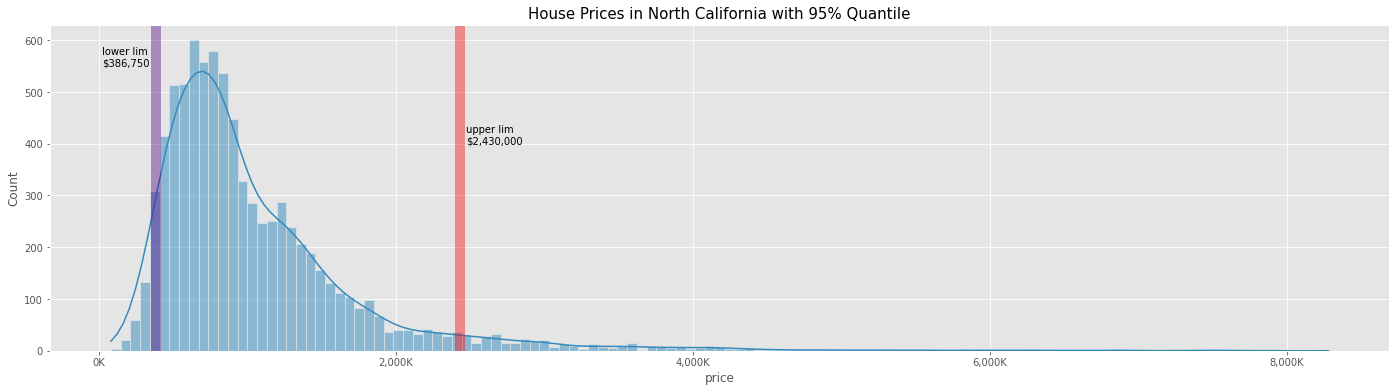

In [15]:
# Making a histogram of the price variable and Quantile based detection
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
# let's define upper using 95th quantile:
upper_lim = df['price'].quantile(0.95)

# let's define upper using 95th quantile:
lower_lim = df['price'].quantile(0.05)

#Plot upper and lower based on 5th, 95th quantile:
ax.axvline(upper_lim, color='red', ls='-', alpha=0.4, lw=10)
ax.axvline(lower_lim, color='indigo', ls='-', alpha=0.4, lw=10)
plt.annotate('upper lim \n$2,430,000', xy=(2430000, 400), xytext=(2470000, 400), fontsize=10)
plt.annotate('lower lim \n$386,750', xy=(20000, 550), xytext=(20000, 550), fontsize=10)
ax.set_title('House Prices in North California with 95% Quantile', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

### 3.2 Outliers: Standard deviation based detection<a id='3.2_Outliers:_Standard_deviation_based_detection'></a>

In [16]:
factor = 1.2
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor

df_std = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

### 3.3 Outliers: Quantile based detection<a id='3.3_Outliers:_Quantile_based_detection'></a>

In [17]:

upper_lim = df['price'].quantile(0.95)
lower_lim = df['price'].quantile(0.05)

df_quant = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

### 3.4 Visualization all difference datasets based on multiple outliers method: Target Variable "price" Visualization using different datasets<a id='3.4_Visualization_all_difference_datasets'></a>

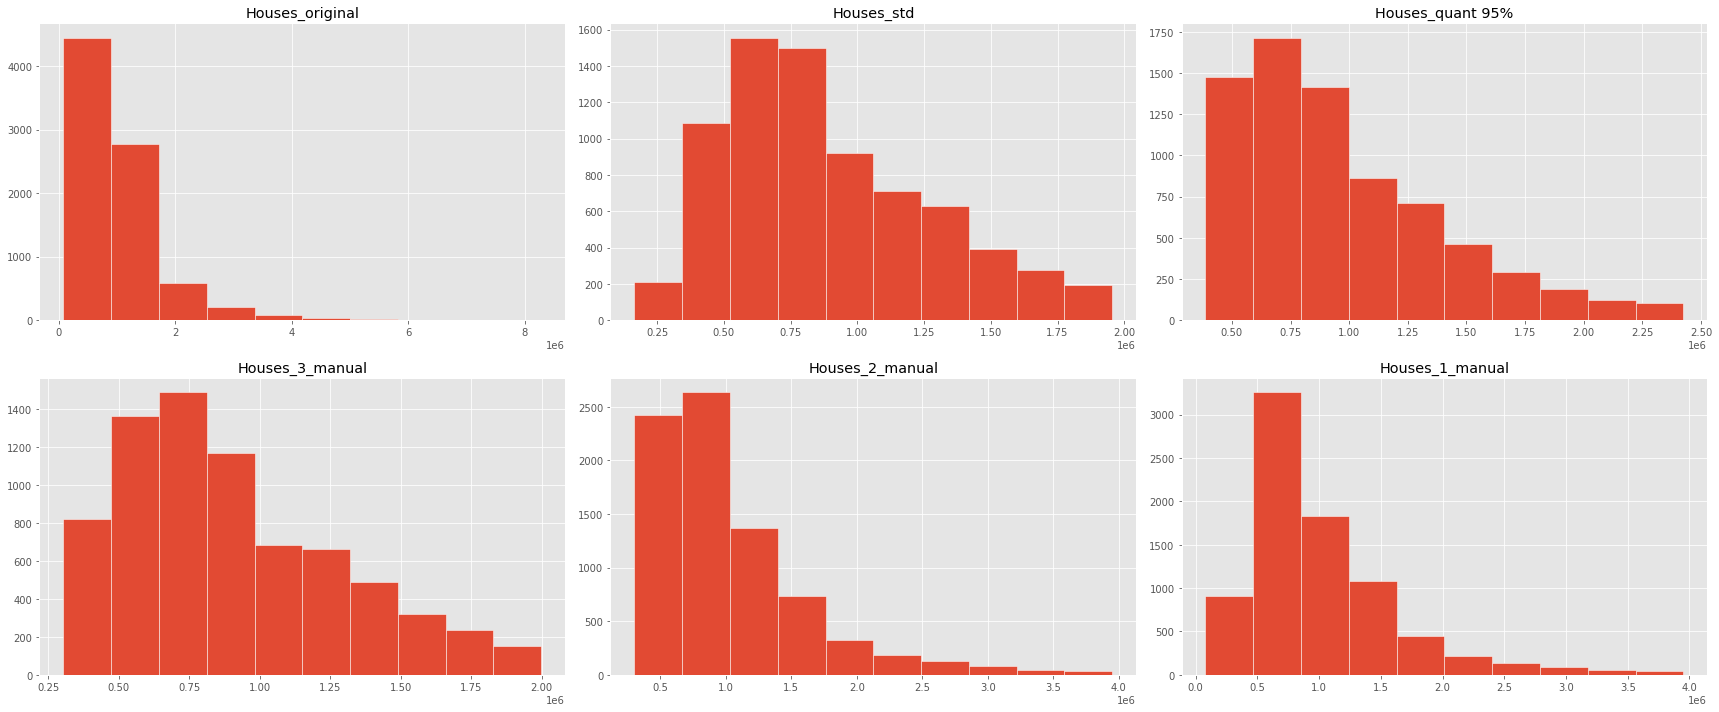

In [18]:
plt.subplots(figsize = (24,10))
plt.subplot(2,3,1)
plt.hist(df[['price']], edgecolor='white') # df is our original dataset where it has the outliers (EDA step output - house prices between $80K-$8M)
plt.title('Houses_original')
plt.subplot(2,3,2)
plt.hist(df_std[['price']], edgecolor='white') # df_std is the data where the outliers were elimitaed using 1.2 standard deviation of the mean
plt.title('Houses_std')
plt.subplot(2,3,3)
plt.hist(df_quant[['price']], edgecolor='white') # df_quant is the data where the outliers were elimitaed using 95th Quantile
plt.title('Houses_quant 95%')
plt.subplot(2,3,4)
plt.hist(price_3[['price']], edgecolor='white') # price_3 is the data where the outliers were elimitaed by keeping house prices between $300K-$2M
plt.title('Houses_3_manual')
plt.subplot(2,3,5)
plt.hist(price_2[['price']], edgecolor='white') # price_2 is the data where the outliers were elimitaed by keeping house prices between $300K-$4M
plt.title('Houses_2_manual')
plt.subplot(2,3,6)
plt.hist(price_1[['price']], edgecolor='white') # price_1 is the data where the outliers were elimitaed by keeping house prices between $80K-$4M
plt.title('Houses_1_manual')
plt.tight_layout()
plt.show()


### 3.5 Datasets comparison using statistics summary:<a id='3.5_Datasets_comparison_using_statistics_summary'></a>

Target Variable "price" Statistics Summary using different datasets

In [19]:
#let's define below pandas series using .describe() method on target variable 'price':
df_main = df['price'].describe()
std_df = df_std['price'].describe()
quant_df = df_quant['price'].describe()
man_price_1 = price_1['price'].describe()
man_price_2 = price_2['price'].describe()
man_price_3 = price_3['price'].describe()

#Let's concatenate all above pandas Series:
df_stat = pd.concat([df_main, std_df, quant_df, man_price_1, man_price_2, man_price_3], axis = 1) 

#let's define top row of the new df df_stat:
columns = ['df_main', 'std_df', 'quant_df', 'man_price_1', 'man_price_2', 'man_price_3'] 
df_stat.loc[len(df_stat.index)] = columns

#Add columns as top row:
header_row = 8
df_stat.columns = df_stat.iloc[header_row]

# Let's drop added row "columns":
df_stat = df_stat.drop(df_stat.index[8])

#Now let's delete the name of the column
df_stat.columns.name = None

df_stat

df_main     std_df     quant_df  man_price_1  man_price_2  \
count         8171       7484         7352         8081         7964   
mean   1.05934e+06     887769       966399  1.01363e+06   1.0249e+06   
std         748142     387091       437422       600975       598064   
min          80000     165000       387000        80000       303482   
25%         610000     590000       635000       610000       620000   
50%         847000     808000       847000       840000       850000   
75%      1.275e+06   1.15e+06  1.21625e+06    1.255e+06  1.26262e+06   
max       8.28e+06  1.955e+06    2.425e+06     3.95e+06     3.95e+06   

       man_price_3  
count         7396  
mean        900685  
std         386134  
min         303482  
25%         603248  
50%         815000  
75%      1.155e+06  
max    1.99889e+06

##### According to the above table, std_df is showig the best, mean, std by eliminating all data greater than 1.2 standard deviation from the mean and at the same we managed only to lose 687 outliers.

### 3.6 Datasets comparision using Correlation and Applying conditional formatting :<a id='3.6_Datasets_comparision_using_Correlation_and_Applying_conditional_formatting'></a>

Target Variable "price" Correlations using different datasets

In [20]:
# Now, let's find correlation to see if our above choice (std_df) is showing the highest correlation:
df_main_corr = df.corr()['price']
std_df_corr = df_std.corr()['price']
quant_df_corr = df_quant.corr()['price']
man_price_1_corr = price_1.corr()['price']
man_price_2_corr = price_2.corr()['price']
man_price_3_corr = price_3.corr()['price']

#Let's concatenate all above pandas Series:
df_stat_corr = pd.concat([df_main_corr, std_df_corr, quant_df_corr, man_price_1_corr, man_price_2_corr, man_price_3_corr], axis = 1) 

#let's define top row of the new df df_stat:
columns = ['df_main_corr', 'std_df_corr', 'quant_df_corr', 'man_price_1_corr', 'man_price_2_corr', 'man_price_3_corr'] 
df_stat_corr.loc[len(df_stat_corr.index)] = columns
df_stat_corr
#Add columns as top row:
header_row = 21
df_stat_corr.columns = df_stat_corr.iloc[header_row]

# Let's drop added row "columns":
df_stat_corr = df_stat_corr.drop(df_stat_corr.index[21])

# Let's drop price for better visibility:
df_stat_corr = df_stat_corr.drop(df_stat_corr.index[1])

#Now let's delete the name of the column
df_stat_corr.columns.name = None

##### Applying conditional formatting and correlation() function with respect to Target Variable "price" using different datasets

In [21]:
def correlation(val):
    """
    Takes a scalar and returns a string with
    the css property "color: green, blue and red" 
    """
    if val < 0: 
        color = 'red'
    elif val > 0.4:
        color = 'green'
    else:
        color = 'blue'
    return 'color: %s' % color

In [22]:
# let's apply conditional formatting using df.style and correlation() function:
Corr_Compare = df_stat_corr.style.applymap(correlation)
Corr_Compare

##### According to the above datasets, std_df is again showig the best correlation between our target variable (price) and all other features when we compare all datasets.

##### Then, let's choose std_df to be our final dataset

In [23]:

px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="price",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House Prices')

fig.show()

In [24]:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="median_income",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House sales per Median Income')

fig.show()

In [25]:
px.set_mapbox_access_token('mapbox_token')
fig = px.scatter_mapbox(df_std, lat='lat', 
                        lon='long', color="school_rating",
                        size_max=20, zoom=7.55, mapbox_style='open-street-map',
                        title = 'Visualizing House sales per School Rating')

fig.show()

In [26]:
#let's name our final df: df_final
df_final = df_std

# let's get the shape of df_final:
df_final.shape

(7484, 23)

In [27]:
# let's view the structure of df_final: 
pd.options.display.max_columns = None
df_final.head()

address              property_type  \
0       6985 calistoga ln, dublin, ca 94568                Condo/Co-op   
1  270 birch creek dr, pleasanton, ca 94566                  Townhouse   
2   5324 brookside ct, pleasanton, ca 94588                Condo/Co-op   
3   4385 clovewood ln, pleasanton, ca 94588  Single Family Residential   
4          4273 trolan ln, dublin, ca 94568  Single Family Residential   

   zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
0    94568   905000     3      4  1994         0              80   
1    94566   645000     2      2  1221      1237             143   
2    94588   940000     4      2  1928      2660             148   
3    94588  1036000     3      2  1355      7708              66   
4    94568  1250000     4      4  3083      3058             143   

   price_per_sqft  hoa_month        lat        long  property_age  \
0             454      388.0  37.733978 -121.872736             3   
1             528      379.0  37.663585 -121.864563            35   
2             488      470.0  37.689374 -121.922526            40   
3             765       33.0  37.680132 -121.915110            55   
4             405      232.0  37.737748 -121.876525             4   

   school_rating  school_count  bart_count  median_income  hotness_score  \
0              8            11           1         119637          83.72   
1              8             9           0         126782          80.07   
2              9             6           1         134451          85.91   
3              9             6           1         134451          85.91   
4              8            11           1         119637          83.72   

   supply_score  demand_score  malls_count  university_count  
0         94.25         73.19            0                 0  
1         79.57         80.57            1                 0  
2         87.06         84.76            1                 0  
3         87.06         84.76            1                 0  
4         94.25         73.19            0                 0

In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 8170
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           7484 non-null   object 
 1   property_type     7484 non-null   object 
 2   zipcode           7484 non-null   int64  
 3   price             7484 non-null   int64  
 4   beds              7484 non-null   int64  
 5   baths             7484 non-null   int64  
 6   sqft              7484 non-null   int64  
 7   lot_size          7484 non-null   int64  
 8   days_on_market    7484 non-null   int64  
 9   price_per_sqft    7484 non-null   int64  
 10  hoa_month         7484 non-null   float64
 11  lat               7484 non-null   float64
 12  long              7484 non-null   float64
 13  property_age      7484 non-null   int64  
 14  school_rating     7484 non-null   int64  
 15  school_count      7484 non-null   int64  
 16  bart_count        7484 non-null   int64  


## 4. Features Engineering<a id='4_Features_Engineering'></a>

### 4.1 Introducing New Features<a id='4.1_Introducing_New_Features'></a>
1. Let's create New 3 categorical  features (boolean variables): 
 * barts: 1 yes barts and 0 no barts 
 * malls: 1 yes malls and 0 no malls
 * universities: 1 yes universities and 0 no Universities 
2. Beds_Baths_tradeoff (bedBath) = beds * baths
3. AvgRoomSize = sqft / (beds + baths)

#### barts

<AxesSubplot:ylabel='Frequency'>

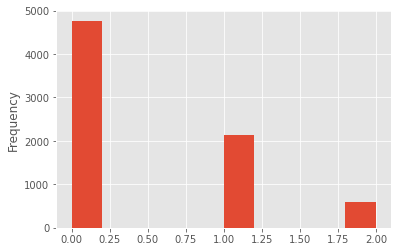

In [29]:
df_final['bart_count'].plot(kind='hist')

In [30]:

df_final['barts'] = [0 if x ==0 else 1 for x in df_final['bart_count']] 


C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='Frequency'>

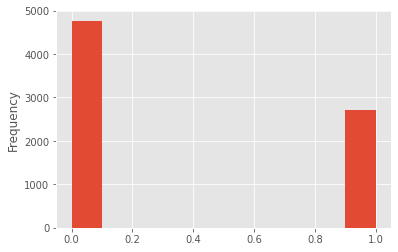

In [31]:
df_final['barts'].plot(kind='hist')

#### malls

<AxesSubplot:ylabel='Frequency'>

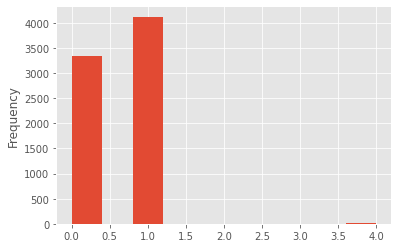

In [32]:
df_final['malls_count'].plot(kind='hist')

In [33]:
df_final['malls'] = [0 if x ==0 else 1 for x in df_final['malls_count']] 

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='Frequency'>

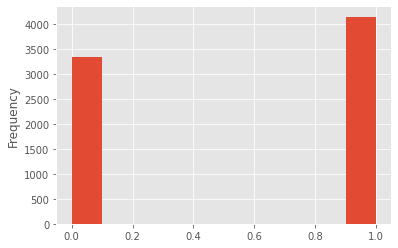

In [34]:
df_final['malls'].plot(kind='hist')

#### universities

<AxesSubplot:ylabel='Frequency'>

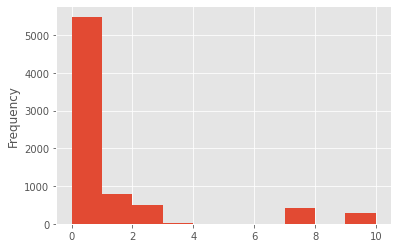

In [35]:
df_final['university_count'].plot(kind='hist')

In [36]:
df_final['universities'] = [0 if x ==0 else 1 for x in df_final['university_count']]

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='Frequency'>

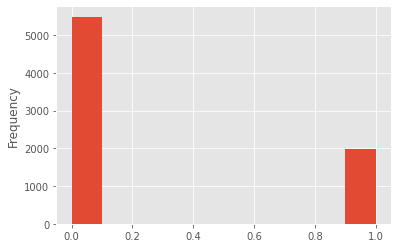

In [37]:
df_final['universities'].plot(kind='hist')

#### bedBath

In [38]:
df_final['bedBath'] = df_final['beds'] * df_final['baths']

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='Frequency'>

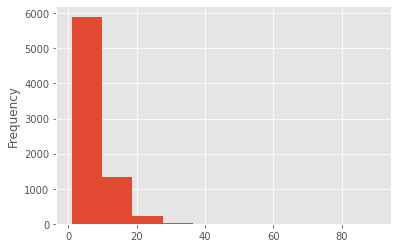

In [39]:
df_final['bedBath'].plot(kind='hist')

#### AvgRoomSize

In [40]:
df_final['AvgRoomSize'] = df_final.sqft/ (df_final.beds + df_final.baths)


C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
df_final['AvgRoomSize'] = round(df_final['AvgRoomSize'], 3)

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='Frequency'>

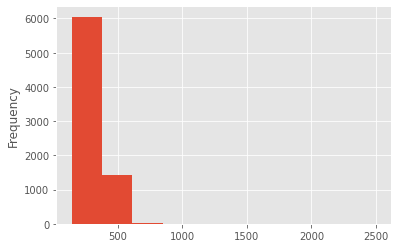

In [42]:
df_final['AvgRoomSize'].plot(kind='hist')

Now let's look at final_df

In [43]:
df_final.head()

address              property_type  \
0       6985 calistoga ln, dublin, ca 94568                Condo/Co-op   
1  270 birch creek dr, pleasanton, ca 94566                  Townhouse   
2   5324 brookside ct, pleasanton, ca 94588                Condo/Co-op   
3   4385 clovewood ln, pleasanton, ca 94588  Single Family Residential   
4          4273 trolan ln, dublin, ca 94568  Single Family Residential   

   zipcode    price  beds  baths  sqft  lot_size  days_on_market  \
0    94568   905000     3      4  1994         0              80   
1    94566   645000     2      2  1221      1237             143   
2    94588   940000     4      2  1928      2660             148   
3    94588  1036000     3      2  1355      7708              66   
4    94568  1250000     4      4  3083      3058             143   

   price_per_sqft  hoa_month        lat        long  property_age  \
0             454      388.0  37.733978 -121.872736             3   
1             528      379.0  37.663585 -121.864563            35   
2             488      470.0  37.689374 -121.922526            40   
3             765       33.0  37.680132 -121.915110            55   
4             405      232.0  37.737748 -121.876525             4   

   school_rating  school_count  bart_count  median_income  hotness_score  \
0              8            11           1         119637          83.72   
1              8             9           0         126782          80.07   
2              9             6           1         134451          85.91   
3              9             6           1         134451          85.91   
4              8            11           1         119637          83.72   

   supply_score  demand_score  malls_count  university_count  barts  malls  \
0         94.25         73.19            0                 0      1      0   
1         79.57         80.57            1                 0      0      1   
2         87.06         84.76            1                 0      1      1   
3         87.06         84.76            1                 0      1      1   
4         94.25         73.19            0                 0      1      0   

   universities  bedBath  AvgRoomSize  
0             0       12      284.857  
1             0        4      305.250  
2             0        8      321.333  
3             0        6      271.000  
4             0       16      385.375

### 4.2 Dropping and encoding Features<a id='4.2_Dropping_and_encoding_Features'></a>

In [44]:
# let's check df_final columns:
df_final.columns

Index(['address', 'property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count', 'bart_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'malls_count', 'university_count', 'barts', 'malls', 'universities',
       'bedBath', 'AvgRoomSize'],
      dtype='object')

1. Let's drop 'address', 'malls_count', 'bart_count', 'lat', 'long'
2. After we drop the above columns, that means we still have one column with 'object' datatype which is 'property_type', so let's encode it manually:
 * Single Family Residential == 0
 * Condo/Co-op == 1
 * Townhouse == 2
   

In [45]:
# let's check property_type distribution:
df_final.property_type.value_counts()

Single Family Residential    5542
Condo/Co-op                  1207
Townhouse                     735
Name: property_type, dtype: int64

In [46]:
# let's encode property_type manually:
df_final.loc[df_final['property_type'] == 'Single Family Residential', 'property_type'] = 0
df_final.loc[df_final['property_type'] == 'Condo/Co-op', 'property_type'] = 1
df_final.loc[df_final['property_type'] == 'Townhouse', 'property_type'] = 2

C:\Users\aktha\anaconda3\lib\site-packages\pandas\core\indexing.py:1763: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:ylabel='Frequency'>

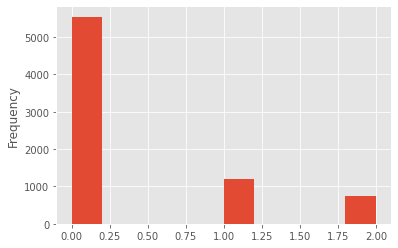

In [47]:
# let's confirm property_type encoding:
df_final.property_type.plot(kind='hist')

In [48]:
# let's check df_final columns:
df_final.columns

Index(['address', 'property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count', 'bart_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'malls_count', 'university_count', 'barts', 'malls', 'universities',
       'bedBath', 'AvgRoomSize'],
      dtype='object')

In [49]:
# let's drop  'address', 'malls_count', 'bart_count', 'lat', 'long' and rename our DataFrame: df_final_v1
df_final_v1 = df_final[['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
                        'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 
                        'property_age', 'school_rating', 'school_count','median_income', 
                        'hotness_score', 'supply_score', 'demand_score','university_count', 
                        'barts', 'malls', 'universities','bedBath', 'AvgRoomSize']]

In [50]:
#let's check correlation with respect to price after dropping and adding the new features:
df_final_v1.corr()['price']

zipcode             0.128117
price               1.000000
beds                0.481437
baths               0.482788
sqft                0.630884
lot_size            0.413622
days_on_market     -0.077447
price_per_sqft      0.494352
hoa_month          -0.229683
property_age       -0.058721
school_rating       0.520341
school_count       -0.275615
median_income       0.546868
hotness_score      -0.241393
supply_score       -0.107441
demand_score       -0.241754
university_count    0.148016
barts              -0.237135
malls              -0.083793
universities        0.157172
bedBath             0.515748
AvgRoomSize         0.393849
Name: price, dtype: float64

In [51]:
#let's chech df_final_v1 structure:
df_final_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7484 entries, 0 to 8170
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   property_type     7484 non-null   object 
 1   zipcode           7484 non-null   int64  
 2   price             7484 non-null   int64  
 3   beds              7484 non-null   int64  
 4   baths             7484 non-null   int64  
 5   sqft              7484 non-null   int64  
 6   lot_size          7484 non-null   int64  
 7   days_on_market    7484 non-null   int64  
 8   price_per_sqft    7484 non-null   int64  
 9   hoa_month         7484 non-null   float64
 10  property_age      7484 non-null   int64  
 11  school_rating     7484 non-null   int64  
 12  school_count      7484 non-null   int64  
 13  median_income     7484 non-null   int64  
 14  hotness_score     7484 non-null   float64
 15  supply_score      7484 non-null   float64
 16  demand_score      7484 non-null   float64


In [52]:
#Finally, let's change property_type from object to int64 after we encoded the values:
df_final_v1['property_type'] = df_final_v1['property_type'].astype('int64')

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 4.3 Final DataFrame Summary<a id='4.3_Final_DataFrame_Summary'></a>

In [53]:
# Alright, Finally let's have a look at our unique values, data types, missing values per variables:
summary = pd.concat([df_final_v1.nunique(), df_final_v1.dtypes, df_final_v1.isnull().sum(), 100*df_final_v1.isnull().mean()], axis=1)
summary.columns =['unique_count', 'dtypes', 'na_count', 'na_%']
summary.sort_values(by='unique_count', ascending=False)

unique_count   dtypes  na_count  na_%
AvgRoomSize               3143  float64         0   0.0
lot_size                  3092    int64         0   0.0
sqft                      2358    int64         0   0.0
price                     1599    int64         0   0.0
price_per_sqft             979    int64         0   0.0
hoa_month                  586  float64         0   0.0
days_on_market             313    int64         0   0.0
property_age               132    int64         0   0.0
zipcode                     88    int64         0   0.0
median_income               88    int64         0   0.0
supply_score                79  float64         0   0.0
demand_score                79  float64         0   0.0
hotness_score               79  float64         0   0.0
bedBath                     22    int64         0   0.0
school_count                16    int64         0   0.0
school_rating               10    int64         0   0.0
beds                         9    int64         0   0.0
baths                        7    int64         0   0.0
university_count             6    int64         0   0.0
property_type                3    int64         0   0.0
barts                        2    int64         0   0.0
malls                        2    int64         0   0.0
universities                 2    int64         0   0.0

Alright, as shown above, all our features are numerical, datatypes are correct and no missing data

Text(0.5, 1.0, 'House Sales - Final Dataframe (No outliers)')

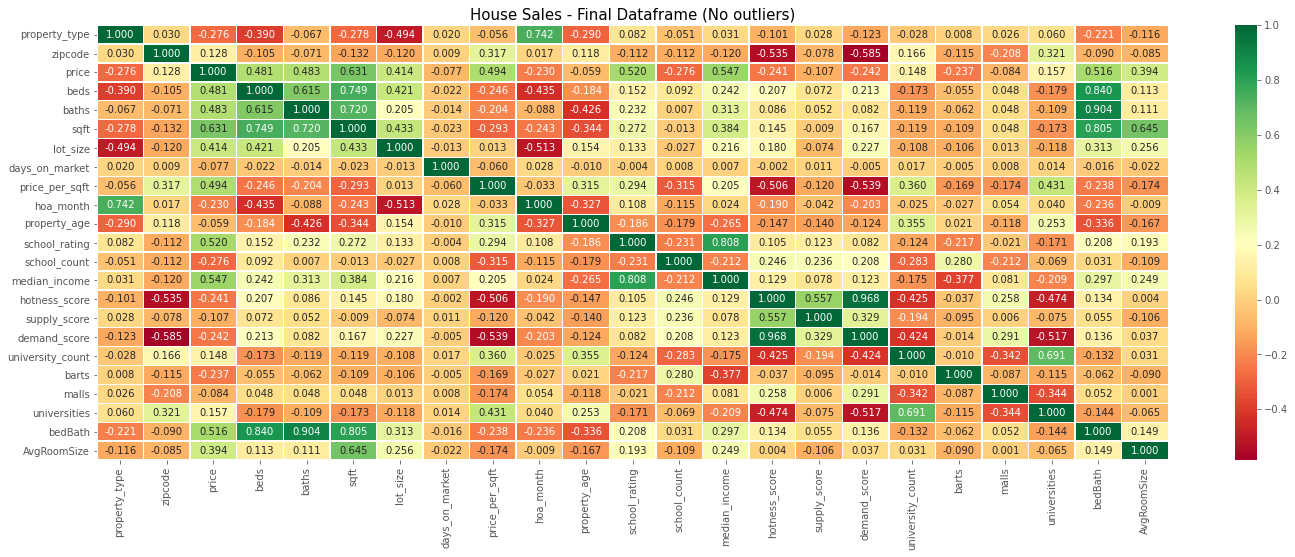

In [54]:
# Make a heatmap of the data 
plt.figure(figsize=(24,8)) # ensure that the Matplotlib plot is big enough
sns.heatmap(df_final_v1.corr(), linewidths=.4, annot=True, fmt=".3f", cmap='RdYlGn')
plt.title('House Sales - Final Dataframe (No outliers)', fontsize=15)

### 4.4 Final Visualization of our Target Variable 'price'<a id='4.4_Final_Visualization_of_our_Target_Variable_'price''></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



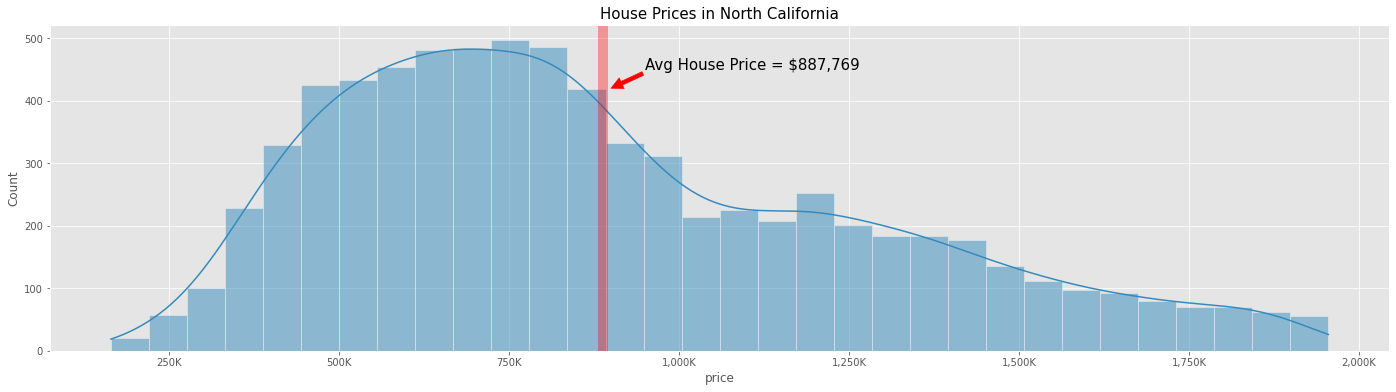

In [55]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df_final_v1['price'], kde=True)
ax.axvline(df_final_v1['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $887,769', xy=(900000, 420), xytext=(950000, 450), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

In [56]:
df_final_v1.describe()['price'].round(2)

count       7484.00
mean      887769.19
std       387091.45
min       165000.00
25%       590000.00
50%       808000.00
75%      1150000.00
max      1955000.00
Name: price, dtype: float64

## 5. Features Selection: Define/Select Features<a id='5_Features_Selection:_Define/Select_Features'></a>


In [57]:
# let's check our final df columns:
df_final_v1.columns

Index(['property_type', 'zipcode', 'price', 'beds', 'baths', 'sqft',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month',
       'property_age', 'school_rating', 'school_count', 'median_income',
       'hotness_score', 'supply_score', 'demand_score', 'university_count',
       'barts', 'malls', 'universities', 'bedBath', 'AvgRoomSize'],
      dtype='object')

In [58]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df_final_v1[features]
y = df_final_v1.price

## 6. Train/Test Split<a id='6_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [59]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 7. Scaling and Transformation: Standardization<a id='7_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [60]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 8. Modeling<a id='8_Modeling'></a>

### 8.1 Linear Regression<a id='8.1_Linear_Regression'></a>

Making a Linear Regression model: our first baseline model. Sklearn has a LinearRegression() function built into the linear_model module. We'll be using that to make our first regression model.

#### 8.1.1 Fitting Linear Regression<a id='8.1.1_Fitting_Linear_Regression'></a>

In [61]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.2f}".format(reg.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred
y_pred = reg.predict(X_test)




R-Squared coefficient : 93.45 %


The above score is called **R-Squared coefficient**, or the **"coefficient of determination"**. It's basically a measure of how successfully our model predicts the variations in the data away from the mean: 1 would mean a perfect model that explains 100% of the variation. **At the moment, our Linear regression model explains 93.5% of the variation from the mean. which is a very good news for a baseline Model**

#### 8.1.2 Linear Regression: intercept & Coefficients<a id='8.1.2_Linear_Regression:_intercept_&_Coefficients'></a>

In [62]:
print("Linear Regression - intercept: {:.3f}".format(reg.intercept_))
print("\n")
print("***Linear Regression - Coefficients***")
print(pd.DataFrame(reg.coef_.round(2), X.columns, columns=['coef']).sort_values(by='coef', ascending=False))

Linear Regression - intercept: 888200.241


***Linear Regression - Coefficients***
                         coef
demand_score      23774469.08
supply_score       7219634.83
price_per_sqft      254471.51
sqft                187036.85
baths               124396.75
beds                124282.23
AvgRoomSize          48510.47
median_income        26188.86
school_rating        25215.83
lot_size             21782.18
hoa_month            15217.41
zipcode              13975.88
universities          9911.85
barts                 6556.78
property_age          5313.78
university_count       947.62
malls                  884.61
days_on_market       -6370.97
property_type        -9576.30
school_count        -10900.93
bedBath            -126978.23
hotness_score    -27024705.95


Linear Regression: intercept & Coefficients Summary:
 * From above Linear Regression coefficients, we can see that **Regularization** is needed: As we know Linear regression minmizes a loss function by choosing  a coefficient for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting easily. so, it is common practice to alter the loss function so that it penalizes for large coefficients using **Regularization**. So next, we'll be using both Ridge Regression and Lasso Regression.
 * Also, we can see that there're few features showing very low Coefficients i.e.  'malls', 'university_count', so if we drop them definteley we'll improve our predictions.




#### 8.1.3 Linear Regression: Residuals Visualization<a id='8.1.3_Linear_Regression:_Residuals_Visualization'></a>

C:\Users\aktha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='price', ylabel='Density'>

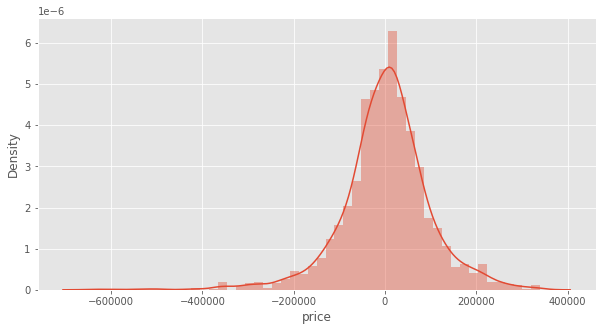

In [63]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred)
sns.distplot(residuals)

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

#### 8.1.4 Linear Regression Model Evaluation<a id='8.1.4_Linear_Regression_Model_Evaluation'></a>

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

In [65]:
from sklearn import metrics

print("********Linear Regression Model Evaluation********")
print("--------------------------------------------------")
print("Linear Regression - r2 Score: {:.2f}".format(metrics.r2_score(y_test, y_pred) * 100), '%')
print("--------------------------------------------------")
print("Linear Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred)))
print("--------------------------------------------------")
print("Linear Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("--------------------------------------------------")
print("Linear Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("--------------------------------------------------")
print("Linear Regression - Variance Score:{:.2f}".format( metrics.explained_variance_score(y_test, y_pred) * 100), '%')
print("--------------------------------------------------")

********Linear Regression Model Evaluation********
--------------------------------------------------
Linear Regression - r2 Score: 93.45 %
--------------------------------------------------
Linear Regression - MAE: 69515.8128
--------------------------------------------------
Linear Regression - MSE:9682059380.4424
--------------------------------------------------
Linear Regression - RMSE:98397.4562
--------------------------------------------------
Linear Regression - Variance Score:93.45 %
--------------------------------------------------


As we can see, the value of **root mean squared error (RMSE) is 98397.45**, which is slightly larger than 10% of the mean value of the Sales Price i.e.  $887,769.19. also, we have **very good variance score at 93.5%. This means that our initial algorithm is working and we're in the right track.**

Text(0, 0.5, 'Prediction')

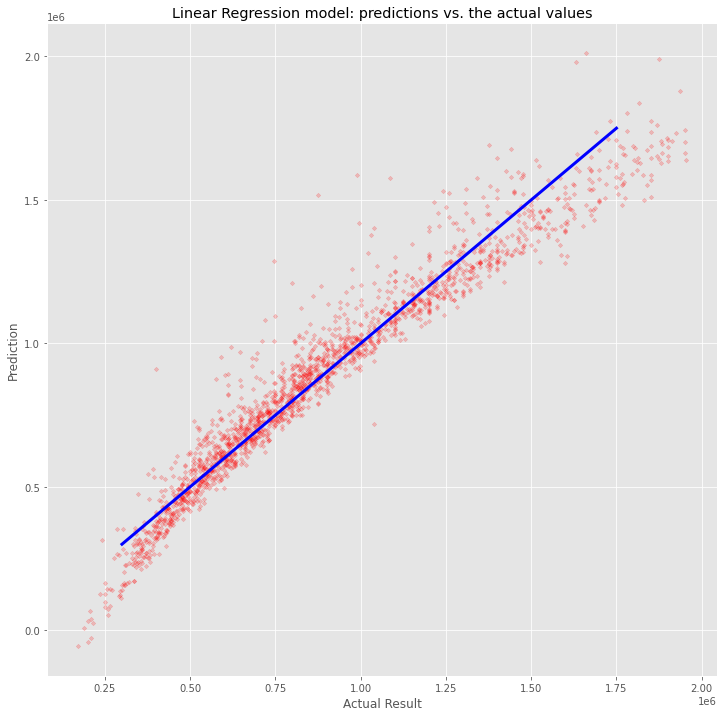

In [66]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(12,12))
plt.scatter(y_test,y_pred, color='red', marker='D', s=10, alpha=0.2)
plt.title('Linear Regression model: predictions vs. the actual values')

# Add a line for perfect correlation
plt.plot([300000,1750000],[300000,1750000],color = 'blue', linewidth=3)

plt.xlabel('Actual Result')
plt.ylabel('Prediction')


In [68]:
df = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted': y_pred.round(3)})
df.head(10).sort_values(by='SalePrice_Actual', ascending=False)


SalePrice_Actual  SalePrice_Predicted
749            1770000          1681297.298
4961            850000           915952.869
8087            825000           862660.295
3544            821000           751188.433
5486            820000           885007.413
572             750000          1096473.831
5444            705000           876200.082
5243            525000           529701.985
4449            525000           570083.700
5605            505000           563283.937

#### 8.1.5 5-fold cross-validation<a id='8.1.5_5-fold_cross-validation'></a>

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.


In [69]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg_c
reg_c = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg_c, 
                            X, 
                            y, 
                            cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores.tolist())
print("Average 5-fold CV Score (r2): {:.3f}".format(np.mean(cv_scores) * 100), '%')


[0.8991277916915489, 0.9157105642624741, 0.8972562110879214, 0.8024192125534753, 0.9294612218196239]
Average 5-fold CV Score (r2): 88.880 %


### 8.2 Models next step:<a id='8.2_Models_next_step'></a>

Now, after building our base Model: Linear regression, let's see if we can further improve our prediction using below algorithms:

 * Ridge Regression (L2 Regularization)
 * Lasso Regression (L1 Regularization)
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Stacking
 * Neural networks

## 9. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
df_final_v1.to_csv(path_or_buf = "path" + "/pre_processing_df.csv", index=False)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))